In [131]:
# 5-Bar Linkage : Inverse Kinematics
#
# equations from Study and Development of Parallel Robots Based On 5-Bar Linkage
# Manh Tuong Hoang, Trung Tin Vuong, Cong Bang Pham 2015
# https://www.researchgate.net/publication/283356024_Study_and_Development_of_Parallel_Robots_Based_On_5-Bar_Linkage

import math
import numpy as np

import matplotlib.pyplot as plt

base = 10 # distance between servos, lc in the paper ^^
proximal = 10 # from each servo to elbow, la ^^
distal = 10 # elbow to pen, lb ^^

# takes point location, returns pair of angles in degrees
# if out of range, throws an error (I can't remember Python exception handling :)
def inverseKinematic(x, y):
    E1 = -2*proximal*x
    F1 = -2*proximal*y
    G1 = proximal*proximal-distal*distal+x*x+y*y
    E4 = 2*proximal*(base-x)
    F4 = -2*proximal*y
    G4 = base*base + proximal*proximal - distal*distal + x*x + y*y - 2*base*x

    # 'lump..' is the equation inside the arctan
    # D1plus etc. are the resulting angles 

    if((E1*E1+F1*F1-G1*G1) > 0 and (G1-E1)!=0):
        lumpD1plus = (-F1+math.sqrt(E1*E1+F1*F1-G1*G1))/(G1-E1)
        D1plus = 2*math.atan(lumpD1plus)
        lumpD1minus = (-F1-math.sqrt(E1*E1+F1*F1-G1*G1))/(G1-E1)
        D1minus = 2*math.atan(lumpD1minus)

    if((E4*E4+F4*F4-G4*G4) > 0 and (G4-E4)!=0):
        lumpD4plus = (-F4+math.sqrt(E4*E4+F4*F4-G4*G4))/(G4-E4)
        D4plus = 2*math.atan(lumpD4plus)
        lumpD4minus = (-F4-math.sqrt(E4*E4+F4*F4-G4*G4))/(G4-E4)
        D4minus = 2*math.atan(lumpD4minus)
    return math.degrees(D1plus), math.degrees(D4minus)
        
# draw servo positions & pen point
# (quick & dirty!)
def draw(angleLeft, angleRight, x, y):
    length = 10 

    leftHome = [0, 0]
    rightHome = [10, 0]

    # sums
    leftEndx = length * math.cos(math.radians(angleLeft)) + leftHome[0]
    leftEndy = length * math.sin(math.radians(angleLeft))
    # transpose for drawing
    leftEnd = [leftEndx , leftEndy]
    xLeft = [leftHome[0], leftEnd[0]]
    yLeft = [leftHome[1], leftEnd[1]]

    rightEndx = length * math.cos(math.radians(angleRight)) + rightHome[0]
    rightEndy = length * math.sin(math.radians(angleRight))
    rightEnd = [rightEndx , rightEndy]
    xRight = [rightHome[0], rightEnd[0]]
    yRight = [rightHome[1], rightEnd[1]]

    plt.xlim(-15, 25), plt.ylim(-15, 25)
    plt.grid()
    plt.scatter(x,y, c='r') 
    plt.plot(xLeft, yLeft)
    plt.plot(xRight, yRight)
    plt.scatter(rightHome[0],rightHome[1], marker = 'o', c='b') 
    plt.scatter(leftHome[0],leftHome[1], marker = 'o', c='b') 
    


Left = 109.32629508411303
Right = 70.67370491588697


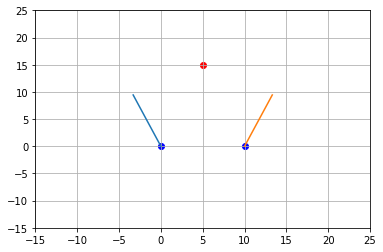

In [132]:
x = 5
y = 15 # with x = 5, min 10, max 19


leftAngle, rightAngle = inverseKinematic(x, y)
print("Left = "+str(leftAngle))
print("Right = "+str(rightAngle))
draw(leftAngle, rightAngle, x, y)

Left = 131.40962210927086
Right = 98.0311612527245


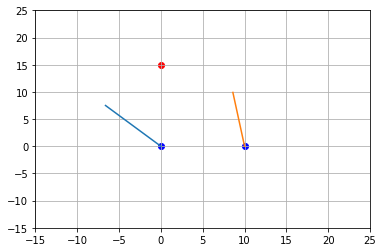

In [133]:
x = 0
y = 15 # with x = 0, min 11, max 17

leftAngle, rightAngle = inverseKinematic(x, y)
print("Left = "+str(leftAngle))
print("Right = "+str(rightAngle))
draw(leftAngle, rightAngle, x, y)